In [1]:
import MyLibrary.phantom as ph
import MyLibrary.RayTransform as RT

import numpy as np
import matplotlib.pyplot as plt

# Computerized Tomography

Computerized tomography (CT) became one of the most popular and standard imaging techniques for medical and industrial applications. Its principle  lies on the property of propagation of X-rays, discovered by Wilhelm Röntgen in 1895 at the university of Würzburg, and was developed by Godfrey Hounsfield who won the Nobel Price in 1979 with Allan M. Cormack who studied the inverse problem associated to the so-called Radon transform.


A photon beam, represented by its intensity $I$, flying in a closed domain $\Omega$ with energy $E$ and direction $\vartheta$ satisfies the \textbf{stationary transport equation}
$$
\vartheta \cdot \nabla_\mathbf{x} I(\mathbf{x},\vartheta) + a_E(\mathbf{x}) I(\mathbf{x},\vartheta) = 0, \qquad \mathbf{x} \in \Omega
$$
with $a_E(\mathbf{x})$ called the lineic attenuation coefficient at energy $E$. This coefficient depends on the type of material and represents the \textit{resistance} of the atomic structure to the propagation of the photons. Consider two points S (source) and D (detector) with respective position $s$ and $d$ and note $s-d = r\vartheta$. Solving this ordinary differential equation between S and D leads to the so-called \textbf{Beer-Lambert law} which describes the attenuation of the photon beam between S and D
$$
I(\mathbf{s}+r\vartheta,\vartheta)= I(\mathbf{s},\vartheta) \exp\left(-\int_{0}^{r} a_E\left(\mathbf{s}+ t \vartheta \right) \mathrm{d}t\right).
$$
\vspace{1em}
This relation implies that knowing the intensity at S and measuring the intensity at D gives an information about the integral of the attenuation coefficient under the form 
$$
\ln \frac{I(\mathbf{s},\vartheta)}{I(\mathbf{s}+r\vartheta,\vartheta)} = \int_{0}^{r} a_E\left(\mathbf{s}+ t \vartheta \right) \mathrm{d}t.
$$
Assuming that the object is compactly supported into $\Omega$ and neglecting the attenuation of the air around the object, one gets 
$$
\ln \frac{I(\mathbf{s},\vartheta)}{I(\mathbf{s}+r\vartheta,\vartheta)} = \int_{\mathbb{R}} a_E\left(\mathbf{s}+ t \vartheta \right) \mathrm{d}t
$$
which is simply the integral of the attenuation coefficient along the straight line passing through $s$ with direction $\vartheta$. In two dimensions, this coincides with the X-ray transform or after a suited change of variable with the well-known Radon transform.


## Fanbeam with arbitrary geometry


This geometry can be selected with the attribute <code>modality  = 'fanbeam'</code>. Here the detectors and source positions needs to be given as input during the whole acquisition process. The source positions is assumed to be a vector while the detectors positions result in a matrix.

In [2]:
modality  = 'fanbeam'
N         = 51
Nrota     = N
Ndetector = 2*N
center    = [N/2,N/2]

In [3]:
#Construction of Source and Detectors coordinates
distOS    = N
distOD    = N/np.sqrt(2)
widthD    = 2*N
theta = -np.pi/2 + 2*np.arange(0,Nrota)*np.pi/(Nrota-1) 
xD = np.arange(0,widthD,widthD/Ndetector) - widthD/2 
yD = distOD*np.ones(Ndetector)

xS,yS = (0,-distOS)

centerRota = [N/20,N/15] #relative to center

S = np.zeros((Nrota,2))
S[:,0] = center[0] + centerRota[0] + (xS-centerRota[0])*np.cos(theta) - (yS-centerRota[1])*np.sin(theta)
S[:,1] = center[1] + centerRota[1] + (yS-centerRota[1])*np.cos(theta) + (xS-centerRota[0])*np.sin(theta)

D = np.zeros((Ndetector,Nrota,2))

for i in range(Ndetector):
    D[i,:,0] = center[0] + centerRota[0] + (xD[i]-centerRota[0])*np.cos(theta) - (yD[i]-centerRota[1])*np.sin(theta)
    D[i,:,1] = center[1] + centerRota[0] + (yD[i]-centerRota[1])*np.cos(theta) + (xD[i]-centerRota[0])*np.sin(theta)

In [4]:
parameters = (D,S,N,center)

In [5]:
#Definition of the object
f0    = ph.phantom(N)

In [6]:
#Computation of the projection matrix and data
Xobj = RT.RayTransform(parameters,modality=modality)
Xobj.computeProjectionMatrix(method='pixel')
g    = Xobj.getData(f0) 

Projection Matrix: [##########]100%  Time elapsed: 0.7 seconds


ART: [##########]100%  Time elapsed: 0.4 seconds


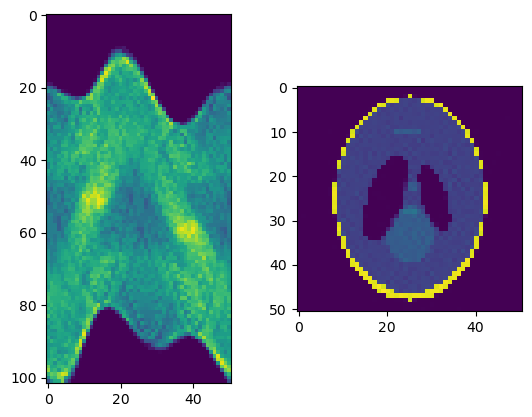

In [7]:
#Reconstruction by Kaczmarz/ART
fK = Xobj.ART(g,sweeps =4)


#Visualisation of the data
fig, (ax1, ax2) = plt.subplots(1, 2, num=3)
ax1.imshow(g)
ax2.imshow(fK)
plt.show()